In [2]:
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
X_train = sparse.load_npz("../data/processed/train/X.npz").toarray()
y_train = np.load("../data/processed/train/y.npy")

In [4]:
X_val = sparse.load_npz("../data/processed/val/X.npz").toarray()
y_val = np.load("../data/processed/val/y.npy")

In [5]:
type(X_train)

numpy.ndarray

In [6]:
type(y_train)

numpy.ndarray

In [7]:
def check(y_val, y_pred):
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_val)

In [9]:
check(y_val, y_pred)

MSE: 1226102742.6849
RMSE: 35015.7499
MAE: 23029.8504
R²: 0.8401


In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_val)
check(y_val, y_pred)

MSE: 1174057332.2517
RMSE: 34264.5200
MAE: 22387.4431
R²: 0.8469


In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, max_iter=1000)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_val)
check(y_val, y_pred)

MSE: 1226390261.7442
RMSE: 35019.8553
MAE: 22985.2744
R²: 0.8401


C:\Users\SPasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.049e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


In [12]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
check(y_val, y_pred)

MSE: 1565772444.2991
RMSE: 39569.8426
MAE: 27686.7740
R²: 0.7959


In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
check(y_val, y_pred)

MSE: 870052036.0805
RMSE: 29496.6445
MAE: 18670.6764
R²: 0.8866


In [14]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_val)
check(y_val, y_pred)


MSE: 735015491.9347
RMSE: 27111.1691
MAE: 16723.2715
R²: 0.9042


In [15]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_val)
check(y_val, y_pred)

MSE: 681993984.0000
RMSE: 26115.0145
MAE: 16704.8008
R²: 0.9111


In [15]:
from sklearn.model_selection import GridSearchCV

xgbr = xgb.XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    tree_method="hist"
)

param_grid = {
    "n_estimators": [300, 600, 1000],
    "learning_rate": [0.03, 0.05, 0.1],
    "max_depth": [3, 4, 5],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
}

grid = GridSearchCV(
    estimator=xgbr,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBRegressor(...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'colsample_bytree': [0.7, 0.8, ...], 'learning_rate': [0.03, 0.05, ...], 'max_depth': [3, 4, ...], 'n_estimators': [300, 600, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the com

In [16]:
best_xgbr = grid.best_estimator_

y_pred = best_xgbr.predict(X_val)
check(y_val, y_pred)

print("Best params:", grid.best_params_)

MSE: 578108800.0000
RMSE: 24043.8932
MAE: 15274.4453
R²: 0.9246
Best params: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.8}


In [16]:
xgbr = xgb.XGBRegressor(
    colsample_bytree=0.7,
    n_estimators=1000, 
    learning_rate=0.05,
    max_depth=4, 
    subsample=0.8,
    random_state=42
)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_val)
check(y_val, y_pred)

MSE: 578108800.0000
RMSE: 24043.8932
MAE: 15274.4453
R²: 0.9246


In [17]:
X_test = sparse.load_npz("../data/processed/test/X.npz").toarray()

In [18]:
y_pred = xgbr.predict(X_test)

In [19]:
y_pred

array([130272.47 , 162060.97 , 189954.03 , ..., 170977.95 , 119891.695,
       217261.12 ], shape=(1459,), dtype=float32)

<Figure size 1000x600 with 0 Axes>

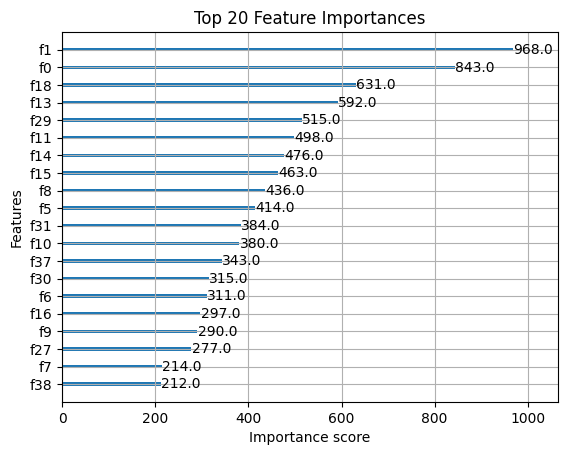

In [20]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(xgbr, max_num_features=20, importance_type='weight')
plt.title("Top 20 Feature Importances")
plt.show()